# Laserscanning - Exercise 8

#### Please upload the implemented solutions till <u>24.01.2023</u> to the studip folder of your group. The file should follow this format:
##### EX08_Group_XX.ipynb (e.g. EX08_Group_04.ipynb)
(In case you need to upload additional files, please also upload them using the same schema, e.g. EX08_Group_04.zip)

# Part I

# Continuation „yardstick example“ from the lecture

In the lecture prior and likelihood were normal distributed. In this example the prior is not normal distributed but given by a mixed distribution:
- 40% of the meter stacks are produced on machine A. Its length is normal distributed with a mean value of 99.0 cm and a standard deviation of 0.5 cm
- 60% of the meter stacks are produced on machine B. Its length is normal distributed with a mean value of 101.0 cm and a standard deviation of 1.0 cm

$$p(\mu)=0.4\cdot N(\mu|\mu_0=99.0, \sigma^2=0.5^2)+0.6\cdot N(\mu|\mu_0=101.0, \sigma^2=1.0^2)$$

The measurement is normal distributed with a standard deviation of 2.0 cm. The measurement is x = 97.0 cm.
$$N(X=97.0|\mu, \sigma^2=2.0^2)$$

The posteriori unnormalised density is:
$$p(\mu|x)=N(x|\mu,\sigma^2)\cdot p(\mu)$$

## Determine the density of the expectation

$$E[\mu]=\int\mu \cdot p(\mu|x)d\mu$$

Use importance sampling with the instrumental density given by a normal distribution with a mean value of $100.0$ cm and
a standard deviation of $2.0$ cm. Compare the results for different $m \in \{10, 100, 1000, 10000\}$.

Plot prior, likelihood and posterior and discuss the results.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform
from scipy.integrate import quad
from matplotlib import cm
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d import Axes3D
import itertools

In [9]:
def prior_stick(x):
    """This the mixed distribution. 
    
    return prior probability for x.
    """
    ### BEGIN SOLUTION
    

    N1 = norm.pdf(x,99.0,0.5)
    N2 = norm.pdf(x,101.0,1.0)
    prior = 0.4*N1 + 0.6*N2
    return prior

    ### END SOLUTION
    
    #raise NotImplementedError()

def likelihood_stick(mu):
    """Likelihood probability with x=97 and parameter mu."""
    ### BEGIN SOLUTION

    N = norm.pdf(mu,97.0,2.0)
    return N
    ### END SOLUTION
    
    #raise NotImplementedError()

# posterior (unnormalisiert) = likelihood * prior.
def posterior_unnorm_stick(y):
    """Posterior unnormalised."""
    ### BEGIN SOLUTION
    posterior = likelihood_stick(y) * prior_stick(y)
    
    return posterior

    ### END SOLUTION
    
    #raise NotImplementedError()

def imp_sampling_mean(m, sampling_dist, posterior):
    ### BEGIN SOLUTION
    
    E = 0
    k =0
    S = sampling_dist.rvs(size = m) #Random variates.
    
    for i in range(m):
        s = S[i]
        q = sampling_dist.pdf(s)#Probability density function.
        p = posterior(s)
        E+=s*p/q
        k+=p/q
        pass
    expectation = E/k
    print(m,":",expectation)   
    
    

    ### END SOLUTION
    
    #raise NotImplementedError()

imp_sampling_mean(10, norm(loc=100.0, scale=2.0), posterior_unnorm_stick)
imp_sampling_mean(100, norm(loc=100.0, scale=2.0), posterior_unnorm_stick)
imp_sampling_mean(1000, norm(loc=100.0, scale=2.0), posterior_unnorm_stick)
imp_sampling_mean(10000, norm(loc=100.0, scale=2.0), posterior_unnorm_stick)
#imp_sampling_mean(100000, norm(loc=100.0, scale=2.0), posterior_unnorm_stick)

10 : 99.09793968723176
100 : 99.26075134523431
1000 : 99.32725484921144
10000 : 99.28652533451815


<u>Please explain your code here:</u>

First we define the function prior_stick(x), likelihood_stick(mu) and posterior_unnorm_stick(y) using the formula mentioned above .We use norm() to calculate Normal distribution.And posterior equals likelihood multiplied by prior.
Expectation: First we use .rvs to generate m random variates. After that we use for-loop to iterate m times. q ist the probality density
in s. p ist posterior in s. Then we cumulative s*p/q to get E and p/q to get k. Finally we get expectation with E/k.


SOME SENTENCES

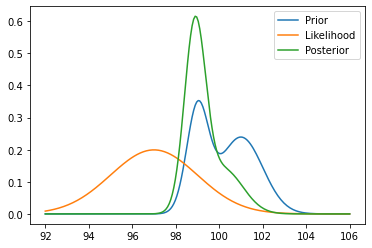

In [10]:
# plot
plt.figure()
xv = np.linspace(92.0, 106.0, 200)
plt.plot(xv, prior_stick(xv), label="Prior")
plt.plot(xv, likelihood_stick(xv), label="Likelihood")
normalization = quad(posterior_unnorm_stick, 70, 130)[0]
plt.plot(xv, posterior_unnorm_stick(xv)/normalization, label="Posterior")
plt.legend()
plt.show()

# Part II

# Robot localization
A robot moves in a 2D room with the dimension of $[0,1] \times[0,1]$. To localize, the robot measures distances to three poles using a laser scanner. The positions $p_i$ of the poles are:
$(0.1, 0.1), (0.7, 0.3),
(0.1, 0.9)$. The three measured distances $d_i$ are:
$0.70710678$, $0.31622777$, $0.58309519$

Where is the robot?
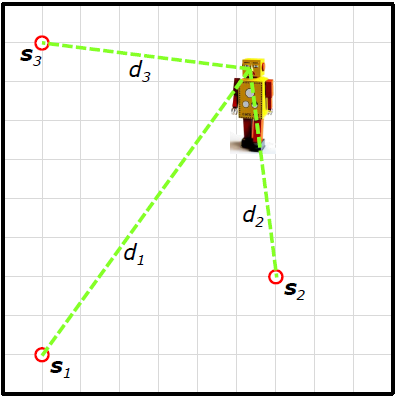

The distance measurements are independent normal
distributed.$~N(x|\mu,\sigma^2)$ with $\sigma=0.1$

The likelihood, of a robot being at position $x$, is:

$$L(\mathbf{x}):=N(\Delta_1|0,\sigma^2)\cdot N(\Delta_2|0,\sigma^2) \cdot N(\Delta_3|0,\sigma^2)$$
where
$$\Delta_i = ||\mathbf{x}-\mathbf{s}_i||-d_i$$

is the difference between the target and the measured distance to the pole $i$.


In [ ]:
# provided plot functions
def plot_scorefunction(landmark_list, measured_ranges, prob_dist,
                       score_function, n = 30, as_well_in_3D = False):
    colormap = cm.jet
    x = np.linspace(0.0, 1.0, n)
    y = np.linspace(0.0, 1.0, n)
    xg, yg = np.meshgrid(x, y)

    points = np.vstack((xg.reshape(n*n), yg.reshape(n*n))).T
    z = score_function(landmark_list, points, measured_ranges,
                       prob_dist).reshape((n,n))
    # 2D contour plot
    plt.figure()
    plt.axis("equal")
    plt.contourf(xg, yg, z, 50, cmap=colormap)

    if as_well_in_3D:
        # 3D plot
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        surf = ax.plot_surface(xg, yg, z, cmap=colormap,
                               rstride=1, cstride=1,
                               linewidth=0.2)


def compute_ranges(landmark_list, position):
    """Given a list of landmarks and a position, compute a vector of distances
       from position to each of the landmarks."""
    # using numpy 1.7.0 and above, this could use the axis=... argument instead.
    return np.array([ np.linalg.norm(x) for x in (landmark_list - position)])


landmarks = np.array(
    [[ 0.1, 0.1 ],
     [ 0.7, 0.3 ],
     [ 0.1, 0.9 ]])


# compute the correct ("measured") ranges for a given ("real") position.
true_position = np.array([0.6, 0.6])
measured_ranges = compute_ranges(landmarks, true_position)
print("Measured ranges =", measured_ranges)

# range measurement distribution
sigma = 0.1
range_dist = norm(loc=0.0, scale=sigma)

In [ ]:
def likelihood(landmark_list, positions, measured_ranges, prob_dist):
    """Given: a list of landmarks, a list of positions, the measured ranges,
       and a probability distribution for the measurement, compute for each
       given position the likelihood."""
    ### BEGIN SOLUTION

    ### END SOLUTION
    
    raise NotImplementedError()

<u>Please explain your code and the general procedure here:</u>

SOME SENTENCES

## Plot the likelihood
Plot the likelihood for the entire room (as „contour“ or 3D plot) Choose an appropriate value for $n$ (number of values per row). You may use the provided ```plot_scorefunction``` function from above.

In [ ]:
plot_scorefunction(landmarks, measured_ranges, range_dist, likelihood, n = 75, as_well_in_3D=True)

## Find Position
### a) Uniform 
Find the (approximate) position of the maximum by drawing 1000 points uniform distributed from $[0,1] \times [0,1]$. Print the value with the max. likelihood.

In [ ]:
def find_max_uniform(landmark_list, measured_ranges, prob_dist, score_function, sample_count):
    """Return (x, y) of sample with maximum z value, and all sampling points."""
    ### BEGIN SOLUTION

    ### END SOLUTION
    
    raise NotImplementedError()

    
# find maximum by uniform sampling
max_uniform = find_max_uniform(landmarks, measured_ranges, range_dist, likelihood, sample_count=1000)
print("\nUniform max", max_uniform[0], "d=", np.linalg.norm(max_uniform[0] - true_position))
plot_scorefunction(landmarks, measured_ranges, range_dist, likelihood)
plt.scatter(max_uniform[1][:,0], max_uniform[1][:,1], color="white", linewidth=0)
plt.axes().set_title("Uniform")

<u>Please explain your code and the result here:</u>

SOME SENTENCES

### b) Ascent Method
Find the (approximate) position of the maximum using a „ascent method“, starting at (0.1, 0.9) Algorithm:

```
x = (0.1, 0.9) # Start value
run 1000 times:
    (dx, dy) ~ N(0.0, 0.052) # Proposal for a „move“
    if L(x+(dx,dy)) > L(x):
    x = x+(dx,dy) # Accept improvement
return x
```

In [ ]:
def find_max_ascent(landmark_list, measured_ranges, prob_dist, score_function, sample_count):
    ### BEGIN SOLUTION

    ### END SOLUTION
    
    raise NotImplementedError()
    
    return pos, np.array(path)


# find maximum by "gradient" ascent.
max_ascent = find_max_ascent(landmarks, measured_ranges, range_dist, likelihood, 1000)
print("Ascent max", max_ascent[0], "d=", np.linalg.norm(max_ascent[0] - true_position))
plot_scorefunction(landmarks, measured_ranges, range_dist, likelihood)
plt.scatter(max_ascent[1][:,0], max_ascent[1][:,1], color="white", linewidth=0)
plt.axes().set_title("Ascent")

<u>Please explain your code and the result here:</u>

SOME SENTENCES

### c) Metropolis-Hastings
Find the (approximate) position of the maximum using the algorithm of Metropolis-Hastings, starting at (0.1, 0.9). Algorithm:

```
x = (0.1, 0.9) # Start value
x_max = x; L_max = L(x)
run 1000 times:
    (dx, dy) ~ N(0.0, 0.12) # Proposal for a „move“
    p = min(L(x+(dx,dy)) / L(x), 1) # Acceptance probability
    u ~ Uniform(0,1)
    if u <= p:
        x = x+(dx,dy) # Accept move
        if L(x) > L_max:
            L_max = L(x) # Notice, if improvement
            x_max = x
return xmax
```

In [ ]:
def find_max_metropolis(landmark_list, measured_ranges, prob_dist, score_function, sample_count):
    ### BEGIN SOLUTION

    ### END SOLUTION
    
    raise NotImplementedError()
    

# find maximum using Metropolis' algorithm.
max_ascent = find_max_metropolis(landmarks, measured_ranges, range_dist, likelihood, 100)
print("Metropolis max", max_ascent[0], "d=", np.linalg.norm(max_ascent[0] - true_position))
plot_scorefunction(landmarks, measured_ranges, range_dist, likelihood)
plt.scatter(max_ascent[1][:,0], max_ascent[1][:,1], color="white", linewidth=0)
plt.axes().set_title("Metropolis")

<u>Please explain your code and the result here:</u>

SOME SENTENCES

### Discuss the results of the 3 methods 

<u>Please discuss the differences of the results here:</u>

SOME SENTENCES

## Permutations
The robot is able to measure distances using its laser scanner but can not distinguish between the objects. When calculating the likelihoods, it must be assumed that every permutation, in other words every combination of assignments, is possible. Therefore the target function is given by:

$$L(\mathbf{x}):=\sum_{k=0}^{5} L_k(\mathbf{x})$$
$$L_k(\mathbf{x}):=N(\Delta_1|0,\sigma^2)\cdot N(\Delta_2|0,\sigma^2) \cdot N(\Delta_3|0,\sigma^2)$$
$$\Delta_i = ||\mathbf{x}-\mathbf{s}_i||-d_j$$
Permutation $k=0$:

$i=1$ : $j=1$

$i=2$ : $j=2$

$i=3$ : $j=3$

Permutation $k=1$:

$i=1$ : $j=1$

$i=2$ : $j=3$

$i=3$ : $j=3$

.

.

.

Permutation $k=6$:

$i=1$ : $j=3$

$i=2$ : $j=2$

$i=3$ : $j=1$



In [ ]:
def perm_likelihood(landmark_list, positions, measured_ranges, prob_dist):
    """Same function as 'likelihood', but assumes that the correct
       landmark identities are unknown."""
    ### BEGIN SOLUTION

    ### END SOLUTION

    raise NotImplementedError()

<u>Please explain your code here:</u>

SOME SENTENCES

##### Re-apply the three methods to the permuted likelihood. Discuss the results.

In [ ]:
# Find maximum by uniform sampling:
max_uniform = find_max_uniform(landmarks, measured_ranges, range_dist, perm_likelihood, sample_count=1000)
print("\nUniform max", max_uniform[0], "d=", np.linalg.norm(max_uniform[0] - true_position))
plot_scorefunction(landmarks, measured_ranges, range_dist, perm_likelihood)
plt.scatter(max_uniform[1][:,0], max_uniform[1][:,1], color="white", linewidth=0)
plt.axes().set_title("Uniform")

# Find maximum by "gradient" ascent:
max_ascent = find_max_ascent(landmarks, measured_ranges, range_dist, perm_likelihood, 1000)
print("Ascent max", max_ascent[0], "d=", np.linalg.norm(max_ascent[0] - true_position))
plot_scorefunction(landmarks, measured_ranges, range_dist, perm_likelihood)
plt.scatter(max_ascent[1][:,0], max_ascent[1][:,1], color="white", linewidth=0)
plt.axes().set_title("Ascent")

# Find maximum using Metropolis' algorithm:
max_ascent = find_max_metropolis(landmarks, measured_ranges, range_dist, perm_likelihood, 1000)
print("Metropolis max", max_ascent[0], "d=", np.linalg.norm(max_ascent[0] - true_position))
plot_scorefunction(landmarks, measured_ranges, range_dist, perm_likelihood)
plt.scatter(max_ascent[1][:,0], max_ascent[1][:,1], color="white", linewidth=0)
plt.axes().set_title("Metropolis")

<u>Please compare your first results with those using permutation here:</u>

SOME SENTENCES

# Part III

# Find Windows in a Facade
Find windows in a point cloud of a building facade. A building facade is measured with a Mobile Mapping System. There are no reflected points at windows. For a better visualization the windows areas can be filled automatically with templates.


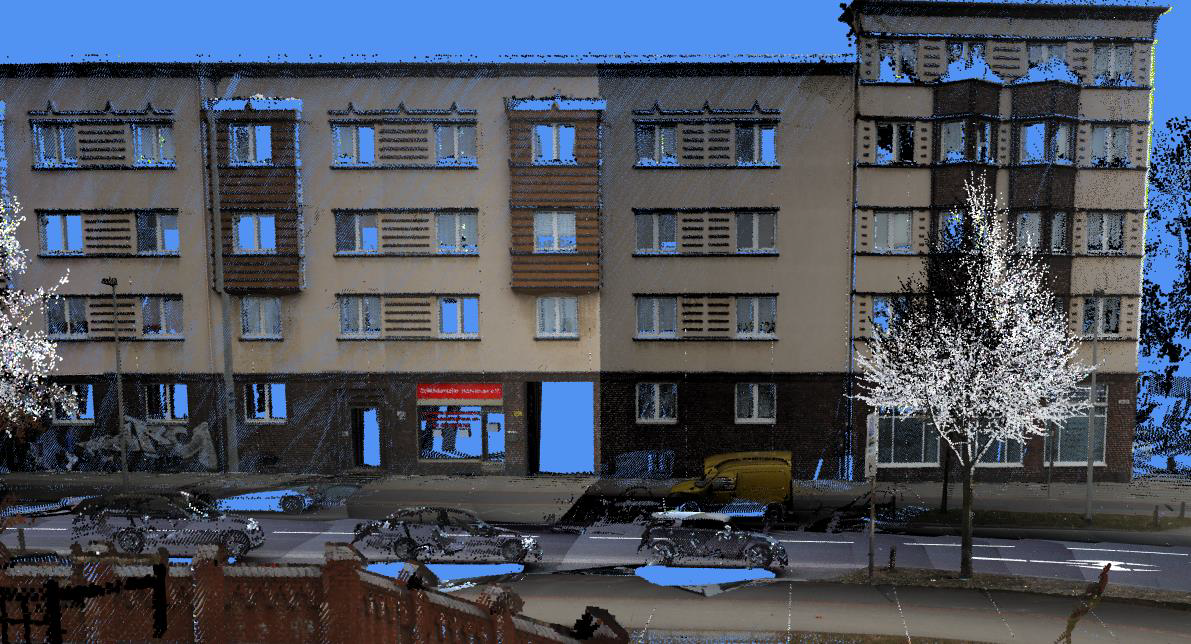




##### How can we automatically find windows?

- Project facade points into 2D space (Given in the files window{1,2,4}.txt)
- 4 parametes needed:
    - Center point ($x$,$y$)
    - height $h$
    - width $w$
- Target function given by a score.

Goal: Few points inside the window area and a large extent of the window -> Find point inside the window and
at the window border.

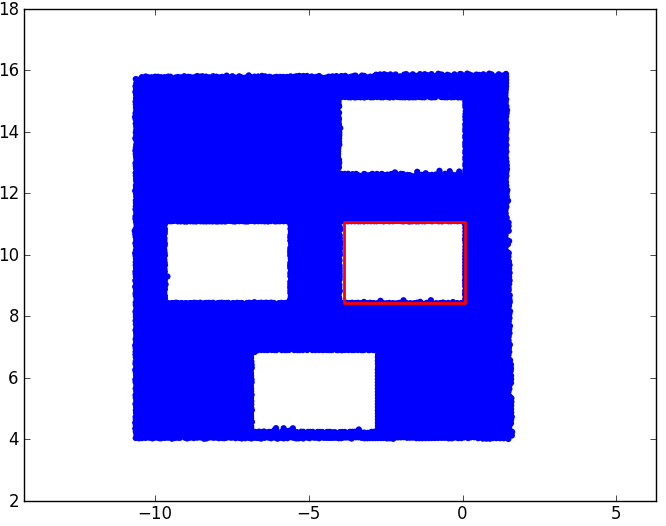

## Score function
- $s_1$: Count points inside the window
- $s_2$: Count points at the border (You can use 0.5 m as border value (e.g boarder width))
- $Score=s_2-2\cdot s_1 + 2 \cdot n$ n: Overall number of points 
    - Add n to prevent a negative score

Hint to reduce the runtime: First choose points inside the border area (including the window). Then draw points inside the window from this subset.

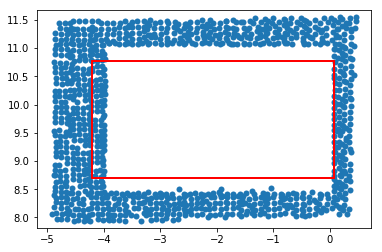

In [11]:
def score(points, window, border):
    """ Calculate score for the window paramters.
        window = [ x_center, y_center, width, height]
    """
    # Force minimum window extents.
    if window[2] < 1.0 or window[3] < 1.0:
        return 0.0
    ### BEGIN SOLUTION
    points_window=[]
    points_border=[]
    for i in range(len(points)):
        if points[i][0]<windows[0]-windows[2]/2 or points[i][0]>windows[0]+windows[2]/2 or  points[i][1]<windows[1]-windows[3]/2 \
        or  points[i][1]<windows[1]-windows[3]/2:
            points_border.append(points[i])
        else:
            points_window.append(points[i])
    score=len(points_border)-2*len(window)+2*len(points)
    return score

    ### END SOLUTION 

#    raise NotImplementedError()

<u>Please explain your code here:</u>
At first should we confirm the min_value and max_value of the window in x and y direction. If x or y coordinate of points is out of the range of window, we count this point at the border, if not, we count this points insides the window. So now we have known s1 and s2, and then just use the function Score=s2-2*s1+2n to calculate the score. N means the number of points.


SOME SENTENCES

## Metropolis-Hastings

Determine the window parameters using the algorithm of Metropolis-Hastings with m = 2000 iterations.
- Start values
    - (x/y): 0.5 ∙ (x_min+x_max), 0.5 ∙ (y_min+y_max)
    - Width: 3.0; Height: 2.0
- Proposed distribution: $q(x)=N(x|\mu=0.0, \sigma^2=0.25^2)$
    - $q(x)$ can be used for all 4 parameters
Test the algorithm several times for 3 data sets (only 1
window must be found)

In [6]:
return xmax
def find_max_metropolis(points, state, border, sample_count):
    
    ### BEGIN SOLUTION
    import random  
    x = (0.5 *(xmin+xmax), 0.5 *(ymin+ymax)) # Start value
    x_max = x; L_max = L(x)
    for i in range(1000):
        (dx, dy) = N(0.0, 0.25) # Proposal for a „move“
        p = min(L(x+(dx,dy)) / L(x), 1) # Acceptance probability
        u = random.uniform(0,1)
        if u <= p:
            x = x+(dx,dy) # Accept move
            if L(x) > L_max:
                L_max = L(x) # Notice, if improvement
                x_max = x
    return x_max
    ### END SOLUTION
    
#    raise NotImplementedError()

    
# Read & plot points.
points = np.loadtxt("window1.txt")
xmin, xmax = np.amin(points[:,0]), np.amax(points[:,0])
ymin, ymax = np.amin(points[:,1]), np.amax(points[:,1])
print("Scene extents: x", xmin, xmax, "y", ymin, ymax)
plt.figure()
plt.scatter(points[:,0], points[:,1], linewidth=0)
plt.axis("equal")

# Model parameter: border area.
border = 0.5

# Run Metropolis to find best rectangle.
xc, yc = (xmin+xmax)/2.0, (ymin+ymax)/2.0  # Init in center of scene.
width, height = 3.0, 2.0  # Init width and height to sensible values.
samples = 2000
result = find_max_metropolis(points, np.array([xc, yc, width, height]), border, samples)
print("Best rectangle\n center", result[0][0:2],"\n width, height", result[0][2:4],"\n score", result[1])

# Plot best rectangle.
plt.axes().add_patch(Rectangle((result[0][0]-result[0][2]/2.0,
                                result[0][1]-result[0][3]/2.0),
                               result[0][2], result[0][3], edgecolor="red",
                               fill=False, linewidth=2))
plt.show()

SyntaxError: 'return' outside function (<ipython-input-6-e119cbe0e0c4>, line 1)

<u>Please explain your code and the result here:</u>

SOME SENTENCES